In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

import random

Using TensorFlow backend.


In [2]:
np.random.seed(0)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()  

In [4]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [5]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels"

assert(X_train.shape[1:] == (28, 28)), "The dimentions of the images are not 28x28"
assert(X_test.shape[1:] == (28, 28)), "The dimentions of the images are not 28x28"

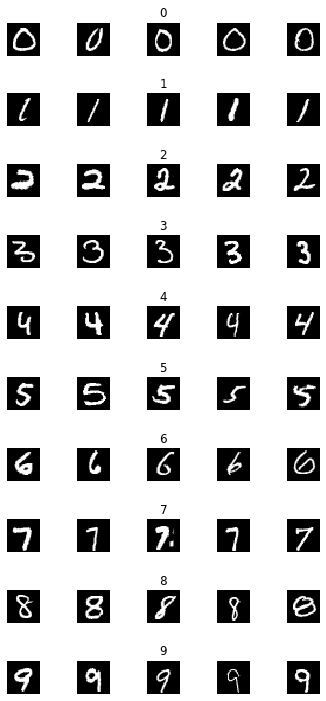

In [6]:
number_of_sample = []

cols = 5
rows = 10

fig, axs = plt.subplots(nrows = rows, ncols = cols, figsize = (5, 10))
fig.tight_layout()

for i in range(cols):
    for j in range(rows):
        x_select = X_train[y_train == j]
        axs[j][i].imshow(
            x_select[random.randint(0, len(x_select - 1)), :, :], 
            cmap = plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            number_of_sample.append(len(x_select))


[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


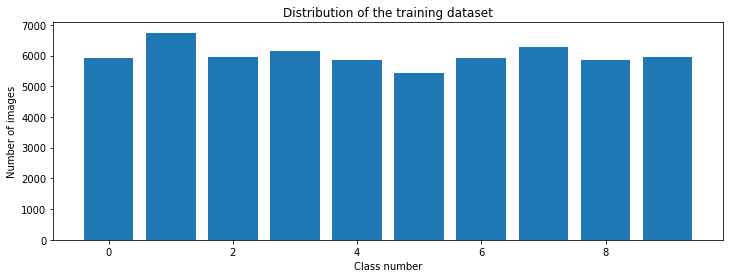

In [7]:
print(number_of_sample)
plt.figure(figsize=(12, 4))
plt.bar(range(0, rows), number_of_sample)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [8]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
number_pixels = 784
X_train = X_train.reshape(X_train.shape[0], number_pixels)
X_test = X_test.reshape(X_test.shape[0], number_pixels)

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [12]:
def create_model():
    model = Sequential()
    model.add(Dense(10, 
                    input_dim = number_pixels, 
                    activation = "relu"))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(rows, activation = 'softmax'))
    model.compile(Adam(lr = 0.01), 
                  loss = 'categorical_crossentropy', 
                  metrics = ['accuracy'])
    
    return model

In [13]:
model = create_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
history = model.fit(X_train, 
                    y_train,
                    validation_split = 0.1,
                    epochs = 30,
                    batch_size = 200,
                    verbose = 1,
                    shuffle = 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 0s 9us/step - loss: 0.5429 - accuracy: 0.8300 - val_loss: 0.2713 - val_accuracy: 0.9222
Epoch 2/30
54000/54000 [==============================] - 0s 6us/step - loss: 0.3021 - accuracy: 0.9112 - val_loss: 0.2321 - val_accuracy: 0.9332
Epoch 3/30
54000/54000 [==============================] - 0s 6us/step - loss: 0.2756 - accuracy: 0.9191 - val_loss: 0.2232 - val_accuracy: 0.9357
Epoch 4/30
54000/54000 [==============================] - 0s 6us/step - loss: 0.2618 - accuracy: 0.9219 - val_loss: 0.2184 - val_accuracy: 0.9333
Epoch 5/30
54000/54000 [==============================] - 0s 6us/step - loss: 0.2489 - accuracy: 0.9270 - val_loss: 0.2185 - val_accuracy: 0.9358
Epoch 6/30
54000/54000 [==============================] - 0s 6us/step - loss: 0.2431 - accuracy: 0.9290 - val_loss: 0.2101 - val_accuracy: 0.9415
Epoch 7/30
54000/54000 [==============================] - 0s 6us/step - los

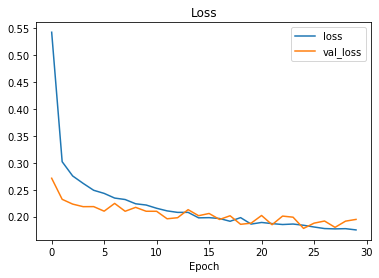

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.legend(['loss', 'val_loss'])
plt.xlabel("Epoch")
plt.show()

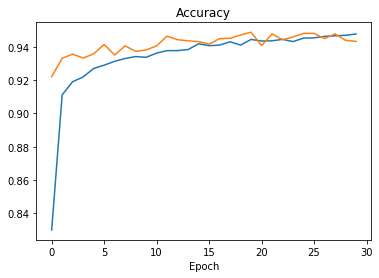

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [19]:
score = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 12us/step


In [25]:
print('Test score', np.round(score[0], 4))
print('Test accuracy', np.round(score[1], 4))

Test score 0.2382
Test accuracy 0.9328
